In [23]:
import numpy as np
import pandas as pd
import math 
import sys
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [4]:
X_train = np.genfromtxt('data/train.csv',  delimiter=',')
X_train = X_train[1:,:-1]

Y_train = np.genfromtxt('data/train_result.csv',  delimiter=',')
Y_train = Y_train[1:,-1]

X_test = np.genfromtxt('data/test.csv',  delimiter=',')
X_test = X_test[1:,:-1]

In [5]:
train_df = pd.read_csv('data/train.csv')

In [9]:
train_df.head()


Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Feature 7  Feature 8  Feature 9  Feature 10  ...  Feature 1560  \
0        0.0        0.0        0.0         0.0  ...  3.854928e-19   
1        0.0        0.0        0.0         0.0  ... -7.118652e-20   
2        0.0        0.0        0.0         0.0  ... -4.619224e-20   
3        0.0        0.0        0.0         0.0  ... -5.346105e-19   
4        0.0        0.0        0.0         0.0  ...  5.494150e-20   

   Feature 1561  Feature 1562  Feature 1563  Feature 1564  Feature 1565  \
0 -1.329011e-20  4.204335e-21  4.428740e-21  4.461340e-23  2.376798e-24   
1  4.062297e-21 -7.743107e-21  8.638654e-22 -1.006311e-21 -2.267525e-22   
2 -3.590984e-20 -2.717642e-20  1.923565e-20 -2.244442e-21 -4.244237e-24   
3 -6.278001e-19 -5.786255e-19  2.573141e-19  2.385063e-19  6.655487e-20   
4 -1.187973e-20 -1.450941e-21  8.954877e-22 -2.645088e-22  1.365356e-23   

   Feature 1566  Feature 1567  Feature 1568  Unnamed: 1568  
0 -7.807106e-24  2.379322e-24 -5.582096e-26            NaN  
1 -5.867730e-23  4.858047e-24 -4.595498e-25            NaN  
2 -3.599564e-23  7.471194e-24 -3.815300e-24            NaN  
3  2.834975e-20  3.356577e-21  1.698628e-21            NaN  
4  8.062470e-24 -1.235689e-24  1.890073e-25            NaN  

[5 rows x 1569 columns]

In [12]:
print(train_df.shape)
type(train_df)


(50000, 1569)


pandas.core.frame.DataFrame

-Each Image is 1568 feature-long. 
-Each image contains 2 digits.
    - Representing a 56x28 pixel image 

-Each digit is a total of 784 pixel (i.e. 1568/2)
    - Representing a 28x28 pixel image 

    

(50000, 1568)
(50000, 784)
(50000, 784)


(1568,)


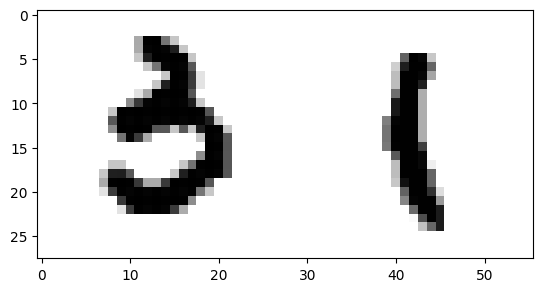

In [6]:
# Try displaying one image 
sampleImage = X_train[1,:]
print(sampleImage.shape)
fig = plt.figure
image = np.reshape(sampleImage, (28,56))
plt.imshow(image, cmap='gray_r')
plt.show()


Overview of label data. 
Labels go from 0 to 18 and we observe a bell-shaped (gaussian-like) distribution.

(50000,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.]


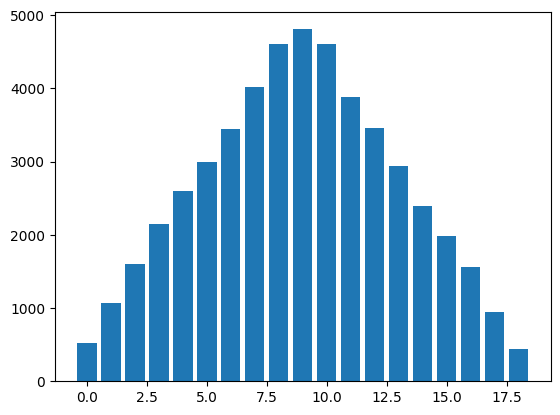

In [24]:
# Class labels summary

# sns.countplot(Y_train)
from collections import Counter
print(Y_train.shape)
print(np.unique(Y_train))
c = Counter(Y_train)
plt.bar(c.keys(), c.values())
plt.show()

In [47]:
class LogisticRegression : 
    # def __init__(self):
    #     pass

    def load_train_data(self, train_inputs, train_labels):
        self.train_inputs=train_inputs
        self.train_labels=train_labels
        self.label_list = np.unique(train_labels)
        self.num_classes = np.unique(train_labels).size
        self.W = None # Weights for logistic regression

    # def addInitialWeight(self, W) : 
    #     self.W 

    # def softmax(inputs):
    #     """
    #     Calculate the softmax for the give inputs (array)
    #     :param inputs:
    #     :return:
    #     """
    #     return np.exp(inputs) / float(sum(np.exp(inputs)))

    # Stackoverflow suggested solution for one-hot encoding - Source : https://stackoverflow.com/questions/38592324/one-hot-encoding-using-numpy
    @staticmethod
    def get_one_hot(targets, nb_classes):
        res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
        return res.reshape(list(targets.shape)+[nb_classes])

    @staticmethod
    def softmax(arrayData):
        """
        Returns an array with the calculated softmax of each of the labels
        """
        # arr = np.zeros(self.num_classes)
        # return np.exp(arrayData) / float(sum(np.exp(arrayData)))
        return (np.exp(arrayData).T / np.sum(np.exp(arrayData),axis=1)).T 
 
    # def cost_derivate_gradient(self,n,Ti,Oi, X):
    #     result = -(np.dot(X.T,(Ti - Oi)))/n   
    #     return result 

    # def function_cost_J(self,n,Ti,Oi):
    #     result = -(np.sum(Ti * np.log(Oi)))/n 
    #     return result

    def costFunc(self, T,O) : 
        n = self.train_inputs.shape[0]
        return -(np.sum(T * np.log(O)))/n 
    
    def costFuncDerivate(self, T, O) :
        X = self.train_inputs
        n = X.shape[0]
        return -(1/n)*(np.dot(np.transpose(X) , (T-O)))

         
    # def gradientDescent(self, X, Y,theta,alpha, learnRate = 0.005, numIteratitions=1000) : # Minimize cross entropy        
    def gradientDescent(self, X, Y, learnRate = 0.005, numIteratitions=1000) : # Minimize cross entropy
        costArr = np.zeros(numIteratitions)
        n=Y.size
        gradient=[]
        costArr=[]
        Y_one_hot = self.get_one_hot(np.int_(Y) , self.num_classes)
        
        
        # W=np.zeros((X.shape[1], Y_one_hot.shape[1]))
        W=np.random.rand(X.shape[1], Y_one_hot.shape[1])




        for k in range (numIteratitions):
            Z = np.matmul(X,W)
            O = self.softmax(Z)
            cost = self.costFunc(Y_one_hot, O)
            costArr.append(cost)
            grad = self.costFuncDerivate(Y_one_hot, O)
            #new weights 
            W -= (learnRate*grad)

            print (f'iteration # {k} of {numIteratitions} ; ({round(k/numIteratitions*100, 2)}%) ; currentCost is {cost}') if k%50 ==0 else None 

        self.W = W
        # print(f'final W after desent is : {self.W}')
        # return costArr, W
        print(f'Starting cost is  : {costArr[0]}. Ending cost is {costArr[-1]}')
        # return W

    def train(self) : 
        X=self.train_inputs
        Y=self.train_labels
        # Y_one_hot = self.get_one_hot(np.int_(Y) , self.num_classes)
        # W=np.zeros((X.shape[1], Y_one_hot.shape[1]))
        # W=np.randommmm((X.shape[1], Y_one_hot.shape[1]))

        # Z=X@self.W 

        # This will update self.W (weights) with the optimal weights after gradientDescent
        self.gradientDescent(X, Y, learnRate = 0.1, numIteratitions=5000)

    
    def compute_predictions(self, X_test) :
        Z = X_test@self.W
        # softmaxArr = self.softmax(Z, axis=1)
        softmaxArr = self.softmax(Z) 

        return np.argmax(softmaxArr,axis=1)


    # def compute_predictions(self, test_data):
    #     X=self.train_inputs
    #     Y=self.train_labels

    def split_dataset(train_inputs,train_labels):

        trainIndexes = [k for k in range(train_inputs.shape[0]) if k % 5 in (0,1,2,4) ]
        validationIndexes = [k for k in range(train_inputs.shape[0]) if k % 5 ==3 ]

        trainX = np.array([train_inputs[k] for k in trainIndexes])
        trainY = np.array([train_inputs[k] for k in trainIndexes])

        validX = np.array([train_inputs[k] for k in validationIndexes])
        validY = np.array([train_inputs[k] for k in validationIndexes])

        # trainX = np.array([banknote[k] for k in range(banknote.shape[0]) if k % 5 in (0,1,2) ])
        # trainSet = np.array([banknote[k] for k in range(banknote.shape[0]) if k % 5 in (0,1,2) ])
        # validationSet = np.array([banknote[k] for k in range(banknote.shape[0]) if k % 5 == 3 ])
        # testSet = np.array([banknote[k] for k in range(banknote.shape[0]) if k % 5 == 4 ])

        # return trainSet, validationSet, testSet
        return trainX, trainY, validX, validY


    @staticmethod
    def conf_matrix(testlabels, predlabels):
        n_classes = int(max(testlabels)) + 1 # +1 since first class is labeled 0
        matrix = np.zeros((n_classes,n_classes))

        for (test, pred) in zip(testlabels, predlabels):
            matrix[int(test),int(pred)]+=1
        return matrix    

    @staticmethod
    def errorRate (testlabels, predlabels) :
        # confmat = self.conf_matrix(self.train_labels, predlabels)
        confmat = LogisticRegression.conf_matrix(testlabels, predlabels)
        # print(confmat)

        # Test error
        sum_total_preds = np.sum(confmat)
        sum_correct_preds = np.sum(np.diag(confmat))
        errorRate = 1.0 - (float(sum_correct_preds) / float(sum_total_preds))
        return errorRate, confmat 






Test code 

With learnRate = 0.1, numIteratitions=5 :
    error rate is 0.89134
    took 5 sec

With learnRate = 0.1, numIteratitions=200 :
    error rate is 0.79278
    took 2min40

With learnRate = 0.01, numIteratitions=500 :
    error rate is 0.84582
    took 6min40

With learnRate = 0.1, numIteratitions=1000 :
    error rate is 0.756
    took 14min

With learnRate = 0.05, numIteratitions=2000 :
    error rate is 0.756
    took min 30min

With learnRate = 1, numIteratitions=200 :
    error rate is 0.85
    took 2min30

With learnRate = 5, numIteratitions=500 :
    error rate is 0.85756
    took 8min30

With learnRate = 0.5, numIteratitions=200 (W is random):
    error rate is 0.84
    took 4min


With learnRate = 0.5, numIteratitions=1000
    error rate is 0.76872
    took 20min

With learnRate = 0.5, numIteratitions=2000
    error rate is 0.7462599999999999
    took 26min

With learnRate = 0.1, numIteratitions=5000 , (W is random) # This one actually looks good (distribution)
    error rate is 0.76848
    took 67min 

In [48]:
LogisticReg= LogisticRegression()
LogisticReg.load_train_data(X_train, Y_train)
LogisticReg.train()

iteration # 0 of 5000 ; (0.0%)
iteration # 50 of 5000 ; (1.0%)
iteration # 100 of 5000 ; (2.0%)
iteration # 150 of 5000 ; (3.0%)
iteration # 200 of 5000 ; (4.0%)
iteration # 250 of 5000 ; (5.0%)
iteration # 300 of 5000 ; (6.0%)
iteration # 350 of 5000 ; (7.0%)
iteration # 400 of 5000 ; (8.0%)
iteration # 450 of 5000 ; (9.0%)
iteration # 500 of 5000 ; (10.0%)
iteration # 550 of 5000 ; (11.0%)
iteration # 600 of 5000 ; (12.0%)
iteration # 650 of 5000 ; (13.0%)
iteration # 700 of 5000 ; (14.0%)
iteration # 750 of 5000 ; (15.0%)
iteration # 800 of 5000 ; (16.0%)
iteration # 850 of 5000 ; (17.0%)
iteration # 900 of 5000 ; (18.0%)
iteration # 950 of 5000 ; (19.0%)
iteration # 1000 of 5000 ; (20.0%)
iteration # 1050 of 5000 ; (21.0%)
iteration # 1100 of 5000 ; (22.0%)
iteration # 1150 of 5000 ; (23.0%)
iteration # 1200 of 5000 ; (24.0%)
iteration # 1250 of 5000 ; (25.0%)
iteration # 1300 of 5000 ; (26.0%)
iteration # 1350 of 5000 ; (27.0%)
iteration # 1400 of 5000 ; (28.0%)
iteration # 1450 o

In [49]:
Y_pred_on_X_train = LogisticReg.compute_predictions(X_train)
errorRate, confmat = LogisticReg.errorRate(testlabels= Y_train, predlabels=Y_pred_on_X_train)
print(f'error rate is {errorRate}')
print(f'Precision is {np.sum(Y_pred_on_X_train==Y_train)/Y_train.size*100}%')
# print(confmat)

error rate is 0.76848
Precision is 23.152%


In [ ]:
# Distribution of predictions 
from collections import Counter
print(Y_pred_on_X_train.shape)
print(np.unique(Y_pred_on_X_train))
c = Counter(Y_pred_on_X_train)
plt.bar(c.keys(), c.values())
plt.show()

(50000,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


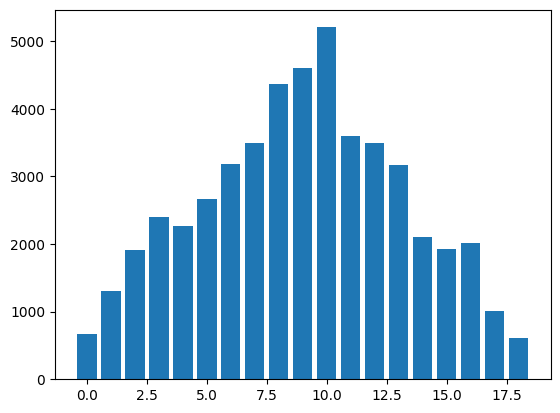

In [57]:
# Distribution of predictions (good shape with 5000 iterations, looks similar to gaussian distribution of real labels)
from collections import Counter
print(Y_pred_on_X_train.shape)
print(np.unique(Y_pred_on_X_train))
c = Counter(Y_pred_on_X_train)
plt.bar(c.keys(), c.values())
plt.show()

(50000,)
[ 0  1  2  3  5  6  8 10 11 14 17 18]


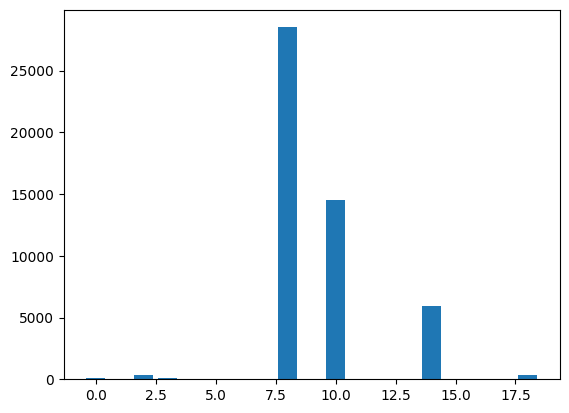

In [24]:
# Distribution of predictions (TERRIBLE ONE for reference with learnRate =5)
# from collections import Counter
# print(Y_pred_on_X_train.shape)
# print(np.unique(Y_pred_on_X_train))
# c = Counter(Y_pred_on_X_train)
# plt.bar(c.keys(), c.values())
# plt.show()

[ 7  6 11 ...  5  0  7]
(1568,)


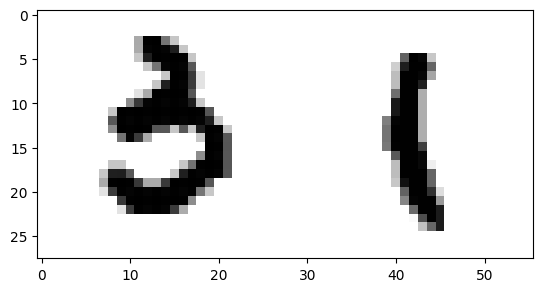

In [109]:
#manually verify some results 
print(Y_pred_on_X_train)
sampleImage = X_train[1,:]
print(sampleImage.shape)
fig = plt.figure
image = np.reshape(sampleImage, (28,56))
plt.imshow(image, cmap='gray_r')
plt.show()


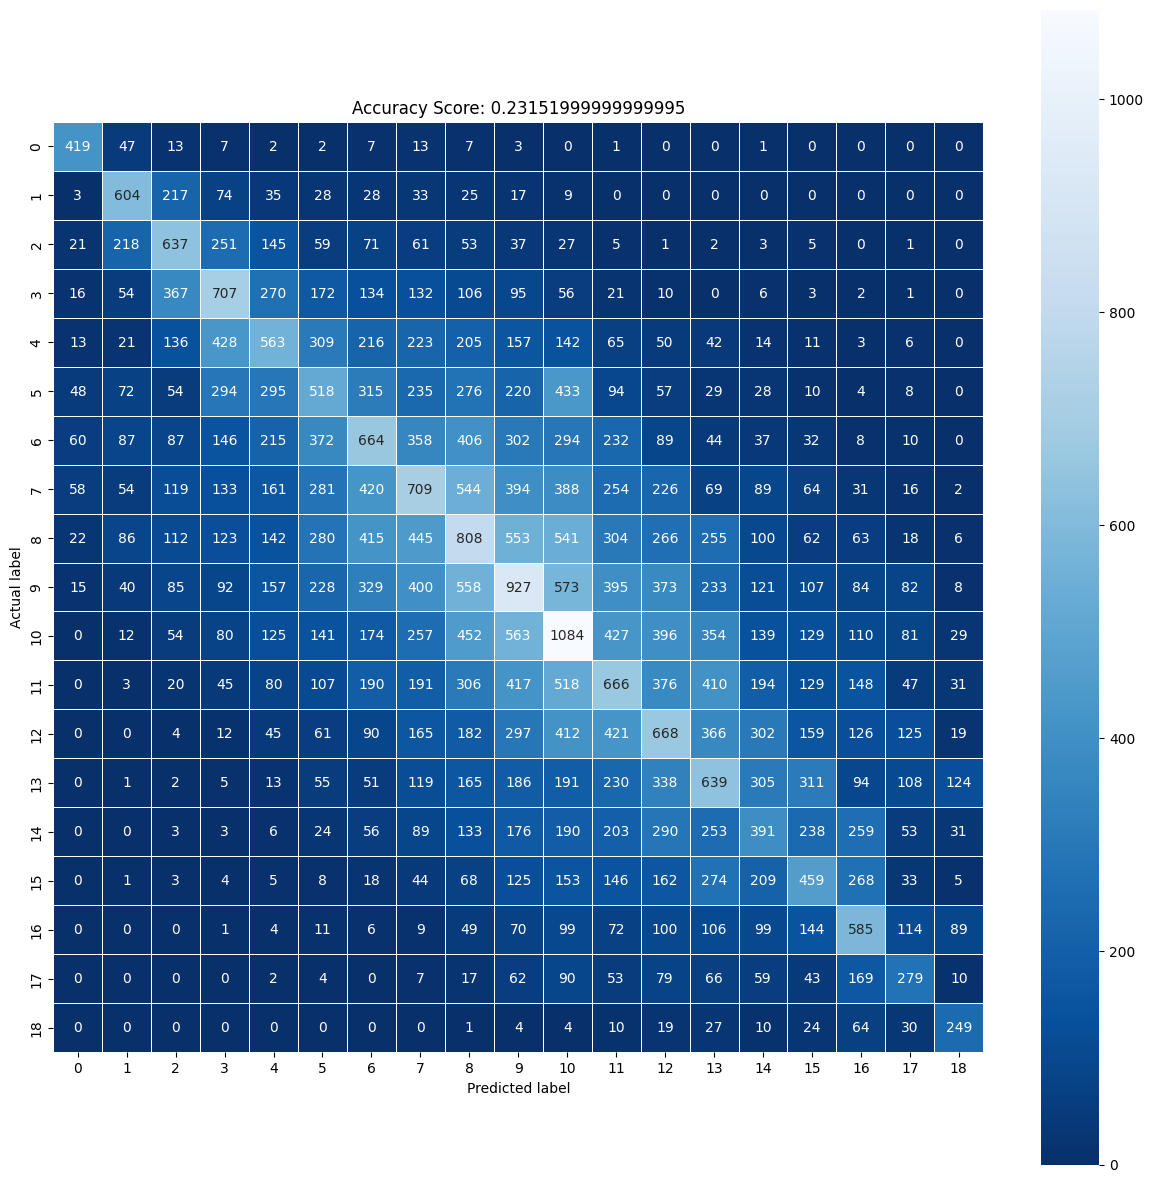

In [58]:
# Show confusion matrix beautified
# Good result with 5000 iterations 
score = 1-errorRate
plt.figure(figsize=(15,15))
sns.heatmap(confmat, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);





4